# COVID Global ScratchPad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,Iran,China,Russia,...,Gambia,Holy See,MS Zaandam,Papua New Guinea,Mauritania,Western Sahara,Bhutan,South Sudan,Sao Tome and Principe,Yemen
2020-04-18,732197,191726,175925,149149,143342,115314,82329,80868,83787,36793,...,9,8,9,7,7,6,5,4,4,1
2020-04-19,758809,198674,178972,154097,145184,121172,86306,82211,83805,42853,...,10,8,9,7,7,6,5,4,4,1
2020-04-20,784326,200210,181228,156480,147065,125856,90980,83505,83817,47121,...,10,9,9,7,7,6,5,4,4,1
2020-04-21,812036,204178,183957,159297,148291,130172,95591,84802,83853,52763,...,10,9,9,7,7,6,6,4,4,1
2020-04-22,839675,208389,187327,157125,150648,134638,98674,85996,83868,57999,...,10,9,9,8,7,6,6,4,4,1


'chg in cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,Iran,China,Russia,...,Gambia,Holy See,MS Zaandam,Papua New Guinea,Mauritania,Western Sahara,Bhutan,South Sudan,Sao Tome and Principe,Yemen
2020-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-19,26612.0,6948.0,3047.0,4948.0,1842.0,5858.0,3977.0,1343.0,18.0,6060.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-20,25517.0,1536.0,2256.0,2383.0,1881.0,4684.0,4674.0,1294.0,12.0,4268.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-21,27710.0,3968.0,2729.0,2817.0,1226.0,4316.0,4611.0,1297.0,36.0,5642.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-04-22,27639.0,4211.0,3370.0,-2172.0,2357.0,4466.0,3083.0,1194.0,15.0,5236.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


'deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,Germany,China,Netherlands,...,Fiji,Chad,Bhutan,Central African Republic,Maldives,Seychelles,Mongolia,Eritrea,South Sudan,Sierra Leone
2020-04-18,38664,23227,20043,19345,15498,5453,5031,4459,4636,3613,...,0,0,0,0,0,0,0,0,0,0
2020-04-19,40661,23660,20453,19744,16095,5683,5118,4586,4636,3697,...,0,0,0,0,0,0,0,0,0,0
2020-04-20,42094,24114,20852,20292,16550,5828,5209,4862,4636,3764,...,0,0,0,0,0,0,0,0,0,0
2020-04-21,44444,24648,21282,20829,17378,5998,5297,5033,4636,3929,...,0,0,0,0,0,0,0,0,0,0
2020-04-22,46583,25085,21717,21373,18151,6262,5391,5279,4636,4068,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,Germany,China,Netherlands,...,Fiji,Chad,Bhutan,Central African Republic,Maldives,Seychelles,Mongolia,Eritrea,South Sudan,Sierra Leone
2020-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-19,1997.0,433.0,410.0,399.0,597.0,230.0,87.0,127.0,0.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-20,1433.0,454.0,399.0,548.0,455.0,145.0,91.0,276.0,0.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-21,2350.0,534.0,430.0,537.0,828.0,170.0,88.0,171.0,0.0,165.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-22,2139.0,437.0,435.0,544.0,773.0,264.0,94.0,246.0,0.0,139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# plot globals?


# Highest Fatality Rates

compare the deaths / cases and find the top -- over a trend line


Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,Iran,China,Russia,...,Gambia,Holy See,MS Zaandam,Papua New Guinea,Mauritania,Western Sahara,Bhutan,South Sudan,Sao Tome and Principe,Yemen
2020-04-18,5.28,10.45,13.20,12.97,3.11,13.44,2.30,6.22,5.53,0.85,...,11.11,0.0,22.22,0.0,14.29,0.0,0.0,0.0,0.0,0.0
2020-04-19,5.36,10.29,13.22,12.81,3.16,13.28,2.34,6.23,5.53,0.84,...,10.00,0.0,22.22,0.0,14.29,0.0,0.0,0.0,0.0,0.0
2020-04-20,5.37,10.42,13.31,12.97,3.31,13.15,2.35,6.24,5.53,0.86,...,10.00,0.0,22.22,0.0,14.29,0.0,0.0,0.0,0.0,0.0
2020-04-21,5.47,10.42,13.40,13.08,3.39,13.35,2.36,6.25,5.53,0.86,...,10.00,0.0,22.22,0.0,14.29,0.0,0.0,0.0,0.0,0.0
2020-04-22,5.55,10.42,13.39,13.60,3.50,13.48,2.41,6.27,5.53,0.88,...,10.00,0.0,22.22,0.0,14.29,0.0,0.0,0.0,0.0,0.0


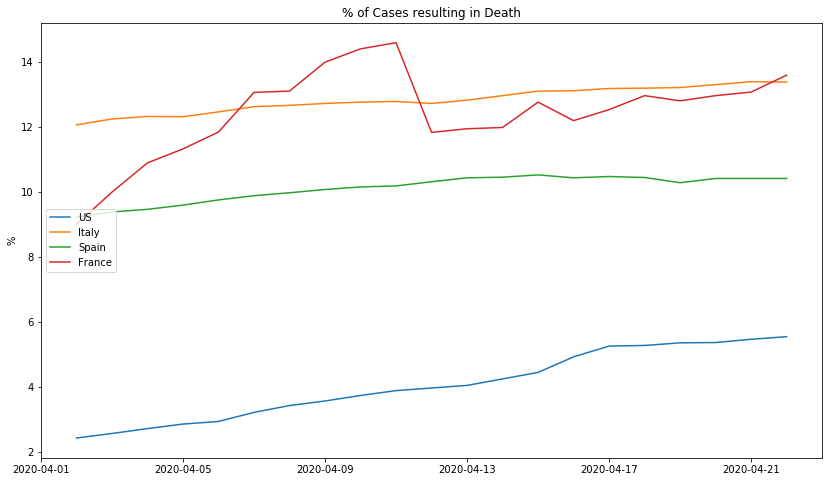

In [27]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

maxdays = 21
maxctys = 15
countries = ['US','Italy','Spain','France']

df_gfat = dfc_g.copy()

for col in df_gfat.columns:
    df_gfat[col] = (dfd_g[col] / df_gfat[col]).mul(100).round(2)
df_gfat = df_gfat.fillna(0)
display(df_gfat.tail())
    
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('% of Cases resulting in Death')
ax1.set_ylabel('%')  # we already handled the x-label with ax1
lines2 = ax1.plot(df_gfat.tail(maxdays).index, df_gfat.tail(maxdays)[countries])
for c,line in enumerate(lines2):
    line.set_label(countries[c])    
ax1.legend(loc='center left')
plt.show()

plt.show()


,2020-04-22 00:00:00 %
Country/Region,
Belgium,14.95
Algeria,13.81
France,13.60
United Kingdom,13.48
Italy,13.39
Sweden,12.10
Netherlands,11.61
Spain,10.42
Hungary,10.38


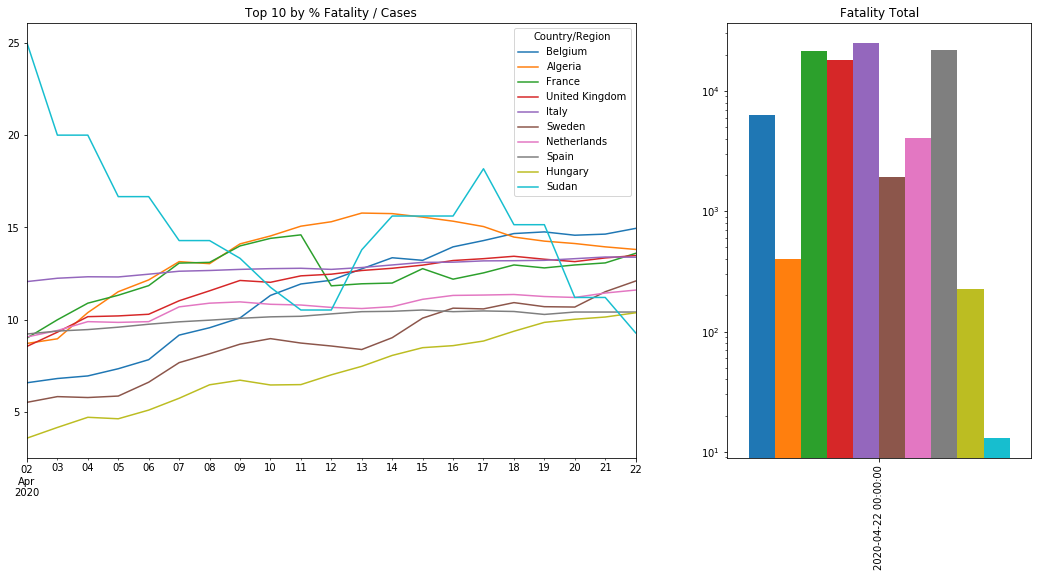

In [28]:
minct = 100
maxdays = 21
maxctys = 10

# sorted only if death count > 100, must transpose first to filter by row
df_gfat2 = dfc_g.copy().transpose()
df_gfat2 = df_gfat2[df_gfat2[df_gfat2.columns[-1]] > minct].transpose()

for col in df_gfat2.columns:
    df_gfat2[col] = (dfd_g[col] / df_gfat2[col]).mul(100).round(2)
df_gfat2 = df_gfat2.fillna(0)
df_gfat2 = df_gfat2.sort_values(df_gfat2.iloc[-1:,:].index.values[0], axis=1, ascending=False)   # column order seems to control legend order
# display(df_gfat2)

dfd_g2 = df_gfat2.copy()  # to hold deaths
for col in dfd_g2.columns:
    dfd_g2[col] = dfd_g[col]
dfd_g2 = dfd_g2.fillna(0)
# display(dfd_g2)

fig, axs = plt.subplots(1,2, sharex=False, figsize=(18,8), gridspec_kw={'width_ratios': [2, 1]})

df_gfat2.iloc[:,0:maxctys].tail(maxdays).plot(ax=axs[0], title='Top 10 by % Fatality / Cases')
dfd_g2.iloc[:,0:maxctys].tail(1).plot(kind='bar',width=3, ax=axs[1], title='Fatality Total', logy=True)
axs[1].get_legend().remove()

display(df_gfat2.iloc[-1:,:].transpose().head(maxctys).rename(columns=lambda x: str(x) + ' %'))


# Lame Stuff Overlay w/ S&P500 from Yahoooo 

In [29]:
#yahoo S&P
sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

,Close,Open,High,Low,US,Iran,Italy,Spain,China,Japan,Global
2020-04-18,2823.159912,2845.620117,2868.979980,2820.429932,732197,80868,175925,191726,83787,10296,2244075
2020-04-19,2823.159912,2845.620117,2868.979980,2820.429932,758809,82211,178972,198674,83805,10797,2324687
2020-04-20,2823.159912,2845.620117,2868.979980,2820.429932,784326,83505,181228,200210,83817,10797,2393378
2020-04-21,2736.560059,2784.810059,2785.540039,2727.100098,812036,84802,183957,204178,83853,11135,2467849
2020-04-22,2799.310059,2787.889893,2815.100098,2775.949951,839675,85996,187327,208389,83868,11512,2539058


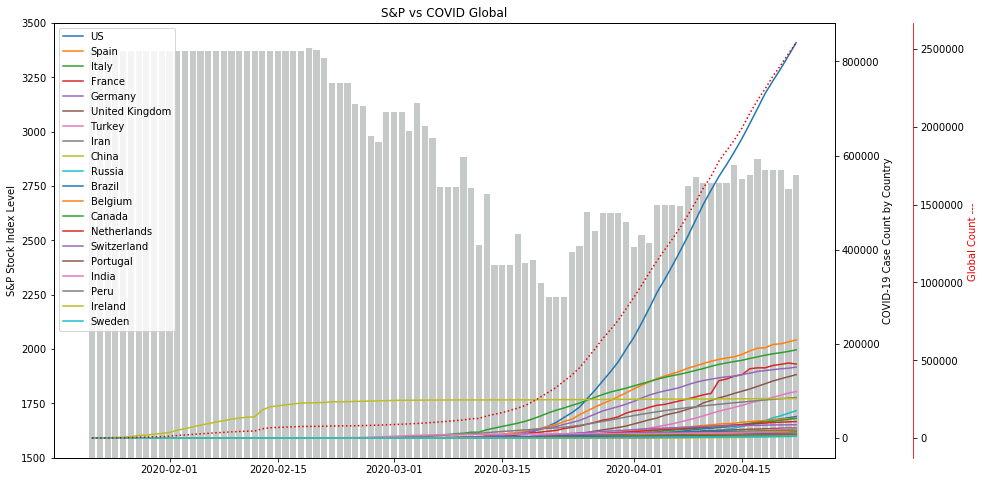

In [30]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('Global Count --- ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


# More Overlaps (Cases - Deaths) - WIP

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

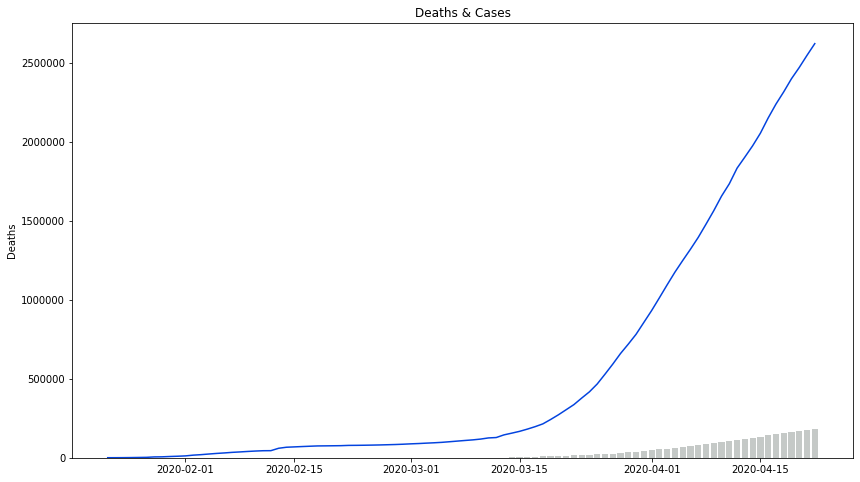

In [31]:
# more overlays -- lets try -- deaths bar, cases line1
dfd_gt = dfd_g.transpose() 
dfc_gt = dfc_g.transpose()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Deaths & Cases')

dfc_gsum = dfc_g.sum(axis=1)
dfd_gsum = dfd_g.sum(axis=1)
display(dfc_gsum.head())

ax1.set_ylabel('Deaths')  # we already handled the x-label with ax1
ax1.bar(dfd_gsum.index, dfd_gsum, color='xkcd:silver')
ax1.plot(dfc_gsum.index, dfc_gsum, color='xkcd:blue')

plt.show()


## Top N-Countries by total cases..


In [32]:
maxdays = 10
maxctys = 15

dfd_g2 = dfd_g.transpose()
dfc_g2 = dfc_g.transpose()
display('top countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(maxctys).iloc[:,-maxdays:])
display('top countries d', dfd_g2.sort_values(by=[dfd_g2.columns[-1]], ascending=False).head(3).iloc[:,-maxdays:])

'top countries'

,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22
Country/Region,,,,,,,,,,
US,580619,607670,636350,667592,699706,732197,758809,784326,812036,839675
Spain,170099,172541,177644,184948,190839,191726,198674,200210,204178,208389
Italy,159516,162488,165155,168941,172434,175925,178972,181228,183957,187327
France,125394,131361,134582,147091,149130,149149,154097,156480,159297,157125
Germany,130072,131359,134753,137698,141397,143342,145184,147065,148291,150648
United Kingdom,89570,94845,99483,104145,109769,115314,121172,125856,130172,134638
Turkey,61049,65111,69392,74193,78546,82329,86306,90980,95591,98674
Iran,73303,74877,76389,77995,79494,80868,82211,83505,84802,85996
China,83213,83306,83356,83403,83760,83787,83805,83817,83853,83868


'top countries d'

,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22
Country/Region,,,,,,,,,,
US,23538,25843,28338,32930,36787,38664,40661,42094,44444,46583
Italy,20465,21067,21645,22170,22745,23227,23660,24114,24648,25085
Spain,17756,18056,18708,19315,20002,20043,20453,20852,21282,21717


## Random analysis of various countries

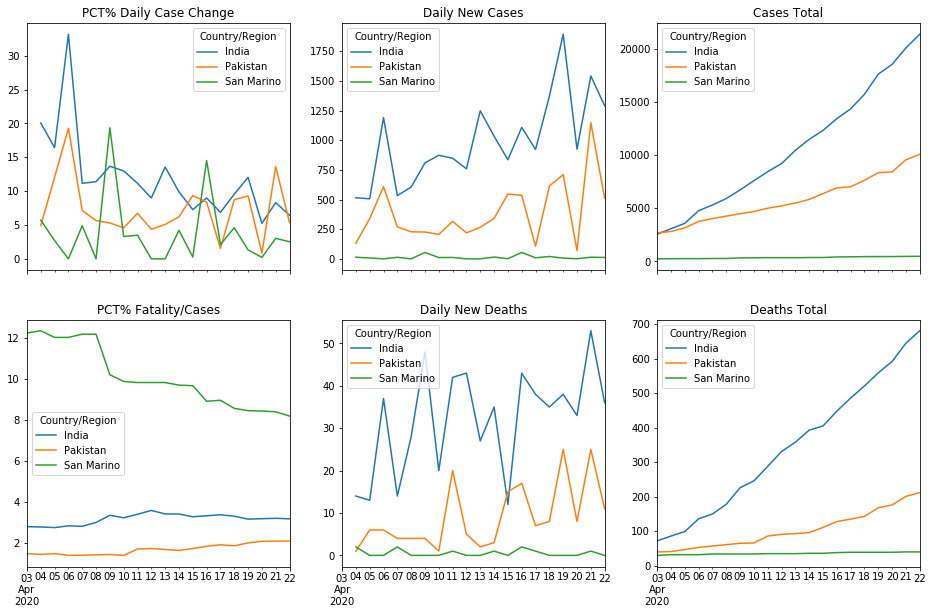

In [70]:
# ad hoc overlays
countries = ['Japan','Singapore','Thailand','Vietnam','India','Korea, South','Pakistan']
countries = ['India','Pakistan','San Marino']
maxdays = 20

fig, axs = plt.subplots(2,3, figsize=(16, 10), sharex=True)
dfc_g3 = dfc_g2.transpose().tail(maxdays).transpose().sort_index()
dfd_g3 = dfd_g2.transpose().tail(maxdays).transpose().sort_index()

pctline = dfc_g3[dfc_g3.index.isin(countries)].pct_change(axis=1).transpose().mul(100).plot(ax=axs[0,0], title='PCT% Daily Case Change')
chgline = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[0,1], title='Daily New Cases')
actline = dfc_g3[dfc_g3.index.isin(countries)].tail(maxdays).transpose().plot(ax=axs[0,2], title='Cases Total')

#i'd like to get the colors to be the same... 
pctline = (dfd_g3[dfd_g3.index.isin(countries)]/dfc_g3[dfc_g3.index.isin(countries)]).transpose().mul(100).plot(ax=axs[1,0], title='PCT% Fatality/Cases')
chgline = dfd_g3[dfd_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[1,1], title='Daily New Deaths')
actline = dfd_g3[dfd_g3.index.isin(countries)].transpose().plot(ax=axs[1,2], title='Deaths Total')
plt.show()

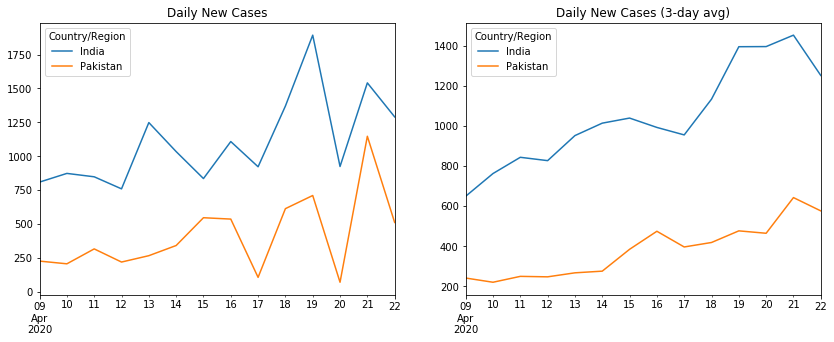

In [73]:
fig, axs = plt.subplots(1,2, figsize=(14,5), sharex=True)
dfc_g3[dfc_g3.index.isin(['India','Pakistan'])].diff(axis=1).transpose().tail(14).plot(ax=axs[0], title='Daily New Cases')
roll = dfc_g3[dfc_g3.index.isin(['India','Pakistan'])].diff(axis=1).transpose().rolling(3, axis=0).mean()
roll.tail(14).plot(ax=axs[1], title='Daily New Cases (3-day avg)')


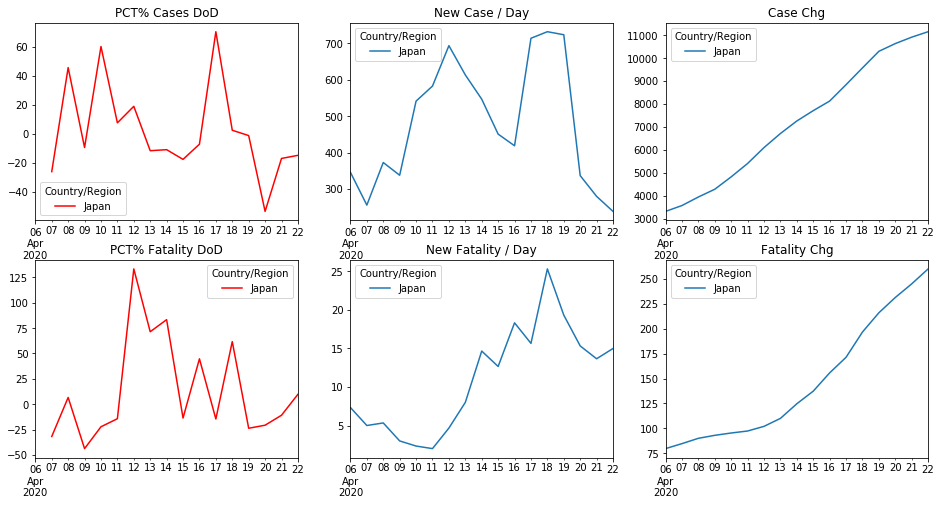

Country/Region,Japan
2020-04-18,0.025210
2020-04-19,-0.011384
2020-04-20,-0.534777
2020-04-21,-0.169307
2020-04-22,-0.147795


Country/Region,Japan
2020-04-18,0.617021
2020-04-19,-0.236842
2020-04-20,-0.206897
2020-04-21,-0.108696
2020-04-22,0.097561


In [34]:
# rolling 3 day to smooth out 
countries = ['Japan']
maxdays3 = maxdays-3  # trim the rolling/diff 3 days

fig, axs = plt.subplots(2,3, figsize=(16, 8), sharex=False, )

dfd_g2r = dfd_g3.rolling(window=3, axis=1).mean().sort_index()
dfc_g2r = dfc_g3.rolling(window=3, axis=1).mean().sort_index()

colors=['Red','Orange','Blue','Green']
pctline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[0,0], title='PCT% Cases DoD', color=colors)
chgline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[0,1], title='New Case / Day')
actline = dfc_g2r[dfc_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[0,2], title='Case Chg')

pctline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[1,0], title='PCT% Fatality DoD' ,color=colors)
chgline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[1,1], title='New Fatality / Day')
actline = dfd_g2r[dfd_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[1,2], title='Fatality Chg')
plt.show()

display(dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail())
display(dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail())


# Rival Countries

Country/Region,India,Poland,Sweden
2020-04-18,15722,8742,13822
2020-04-19,17615,9287,14385
2020-04-20,18539,9593,14777
2020-04-21,20080,9856,15322
2020-04-22,21370,10169,16004


Country/Region,India,Poland,Sweden
2020-04-18,521,347,1511
2020-04-19,559,360,1540
2020-04-20,592,380,1580
2020-04-21,645,401,1765
2020-04-22,681,426,1937


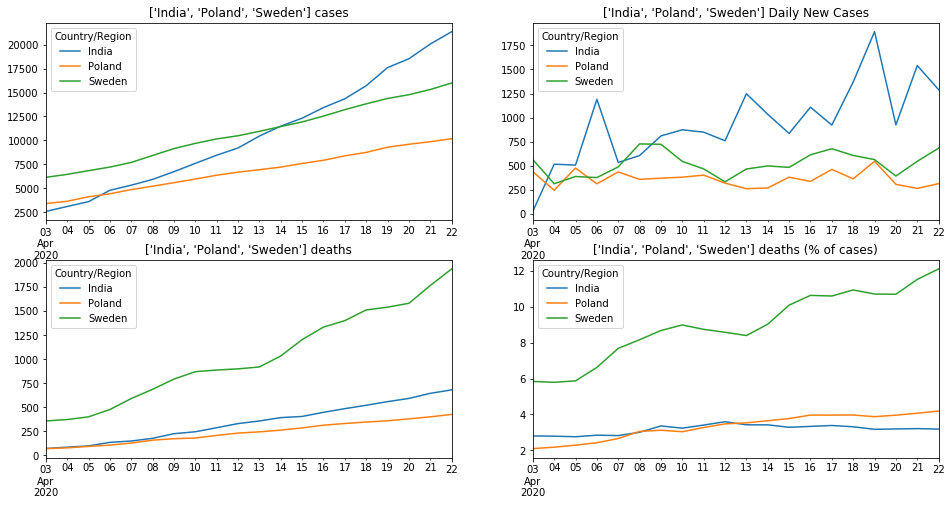

In [35]:
maxdays = 20
countries = ['India','Poland','Sweden']

fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=False )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-18,37183,31766,3537
2020-04-19,38496,32838,3550
2020-04-20,39983,33588,3558
2020-04-21,40956,34317,3618
2020-04-22,41889,35032,3654


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-18,5453,3613,72
2020-04-19,5683,3697,73
2020-04-20,5828,3764,75
2020-04-21,5998,3929,78
2020-04-22,6262,4068,80


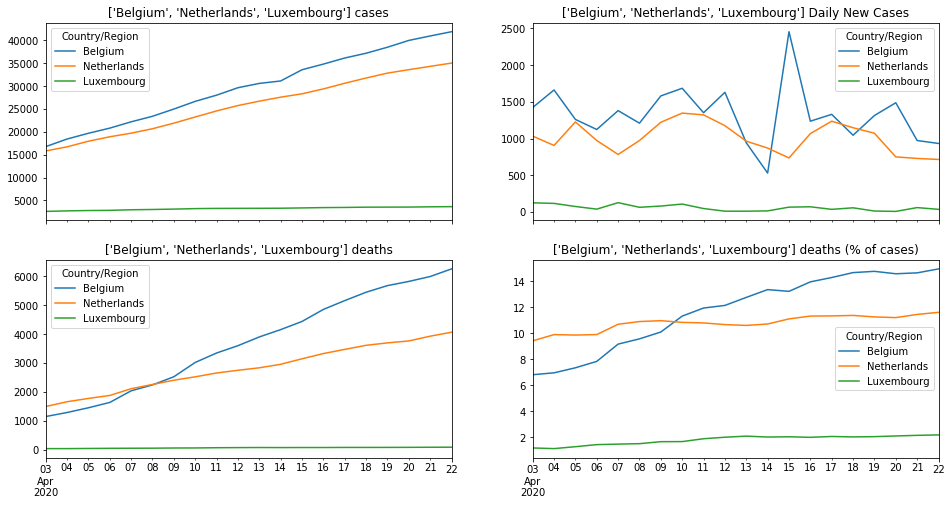

In [36]:
# benelux
maxdays = 20
countries = ['Belgium','Netherlands','Luxembourg']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))

Country/Region,Finland,Norway,Sweden
2020-04-18,3681,7036,13822
2020-04-19,3783,7078,14385
2020-04-20,3868,7156,14777
2020-04-21,4014,7191,15322
2020-04-22,4129,7338,16004


Country/Region,Finland,Norway,Sweden
2020-04-18,90,164,1511
2020-04-19,94,165,1540
2020-04-20,98,181,1580
2020-04-21,141,182,1765
2020-04-22,149,187,1937


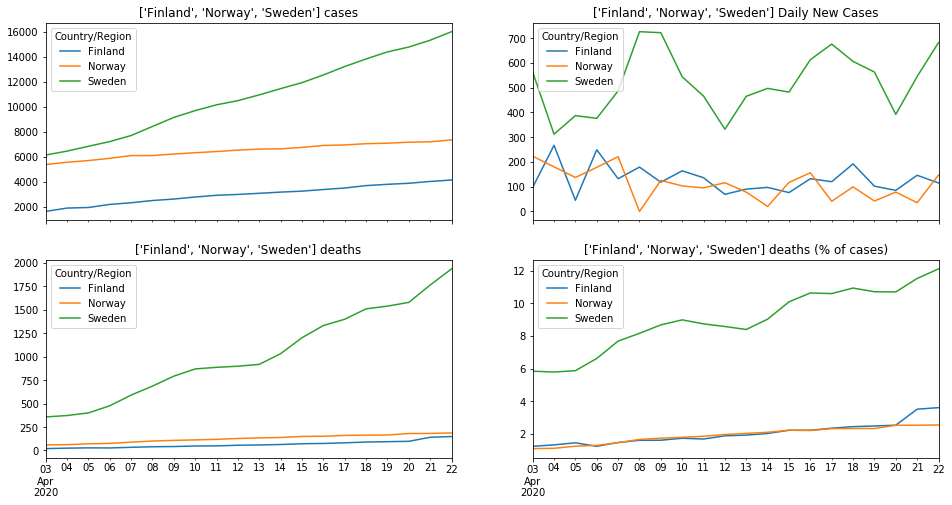

In [37]:
# nordics
maxdays = 20
countries = ['Finland','Norway','Sweden']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


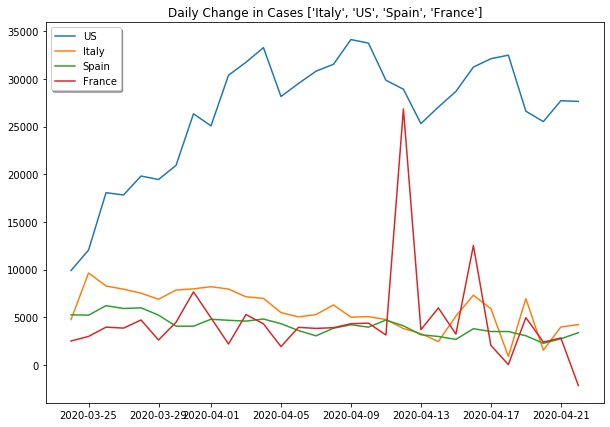

Country/Region,US,Spain,Italy,France
2020-04-18,32491.0,887.0,3491.0,19.0
2020-04-19,26612.0,6948.0,3047.0,4948.0
2020-04-20,25517.0,1536.0,2256.0,2383.0
2020-04-21,27710.0,3968.0,2729.0,2817.0
2020-04-22,27639.0,4211.0,3370.0,-2172.0


In [38]:
# global rate
maxdays = 30
countries = ['Italy','US','Spain','France']
sorthack = ['US','Italy','Spain','France']

dfc_gdiff= dfc_g.transpose().sum().diff()

plt.figure(figsize=(10,7)) 
plt.plot(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(maxdays))
# plt.plot(dfc_gdiff.tail(30))
plt.legend(sorthack, loc='upper left', shadow=True)  # bit of pain to name these manually in order
plt.title('Daily Change in Cases '+str(countries))

plt.show()
display(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(5))


,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22
Country/Region,,,,,,,,,,
US,554109.0,581201.0,608213.0,637204.0,667883.0,699832.0,730237.0,758444.0,785057.0,812012.0
Spain,166652.0,169824.0,173428.0,178378.0,184477.0,189171.0,193746.0,196870.0,201021.0,204259.0
Italy,156050.0,159456.0,162386.0,165528.0,168843.0,172433.0,175777.0,178708.0,181386.0,184171.0
France,113990.0,126156.0,130446.0,137678.0,143601.0,148457.0,150792.0,153242.0,156625.0,157634.0
Germany,127611.0,129762.0,132061.0,134603.0,137949.0,140812.0,143308.0,145197.0,146847.0,148668.0
United Kingdom,84883.0,89874.0,94633.0,99491.0,104466.0,109743.0,115418.0,120781.0,125733.0,130222.0
Turkey,56724.0,61039.0,65184.0,69565.0,74044.0,78356.0,82394.0,86538.0,90959.0,95082.0
Iran,71673.0,73289.0,74856.0,76420.0,77959.0,79452.0,80858.0,82195.0,83506.0,84768.0
China,83120.0,83218.0,83292.0,83355.0,83506.0,83650.0,83784.0,83803.0,83825.0,83846.0


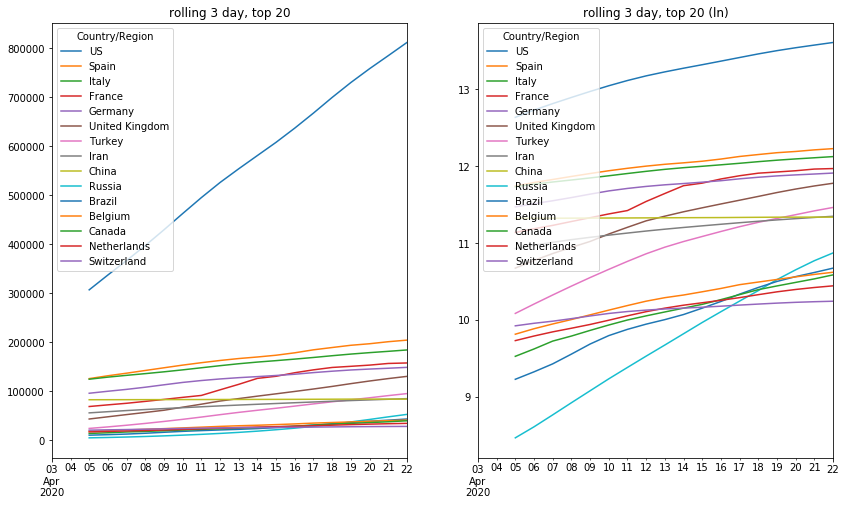

In [39]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Global Population Comparisons

In [40]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.shape, df_gpop_2016.head(3), dfc_g.transpose().shape, dfc_g.tail(1).transpose().head(3))  #262 countries

df_gmerged = pd.merge(left=dfc_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region', how='outer')
df_gmerged = df_gmerged.rename(columns={df_gmerged.columns[1]:'Cases', 'Value':'Population'})
df_gmerged['% of pop'] = (df_gmerged['Cases'] / df_gmerged['Population']).mul(100).round(2)

dfd_gmerged = pd.merge(left=dfd_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region', how='outer')
dfd_gmerged = dfd_gmerged.rename(columns={dfd_gmerged.columns[1]:'Deaths', 'Value':'Population'})
dfd_gmerged['% of pop'] = (dfd_gmerged['Deaths'] / dfd_gmerged['Population']).mul(100).round(2)

display(df_gmerged.shape, df_gmerged.sort_values(by=['% of pop'], ascending=False).head())
display(dfd_gmerged.shape, dfd_gmerged.sort_values(by=['% of pop'], ascending=False).head(10).drop(columns=['Country Code','Year']))


(262, 4)

,Country/Region,Country Code,Year,Value
56,Arab World,ARB,2016,404024433
115,Caribbean small states,CSS,2016,7269386
174,Central Europe and the Baltics,CEB,2016,102994343


(185, 92)

,2020-04-22
Country/Region,
US,839675
Spain,208389
Italy,187327


(289, 6)

,Country/Region,Cases,Country Code,Year,Population,% of pop
100,San Marino,488.0,SMR,2016.0,33504.0,1.46
88,Andorra,723.0,AND,2016.0,77297.0,0.94
50,Luxembourg,3654.0,LUX,2016.0,582014.0,0.63
63,Iceland,1785.0,ISL,2016.0,335439.0,0.53
1,Spain,208389.0,ESP,2016.0,46484062.0,0.45


(289, 6)

,Country/Region,Deaths,Population,% of pop
68,San Marino,40.0,33504.0,0.12
5,Belgium,6262.0,11331422.0,0.06
72,Andorra,37.0,77297.0,0.05
2,Spain,21717.0,46484062.0,0.05
1,Italy,25085.0,60627498.0,0.04
3,France,21373.0,66721256.0,0.03
4,United Kingdom,18151.0,65611593.0,0.03
17,Ireland,769.0,4755335.0,0.02
9,Netherlands,4068.0,17030314.0,0.02
13,Sweden,1937.0,9923085.0,0.02


C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version


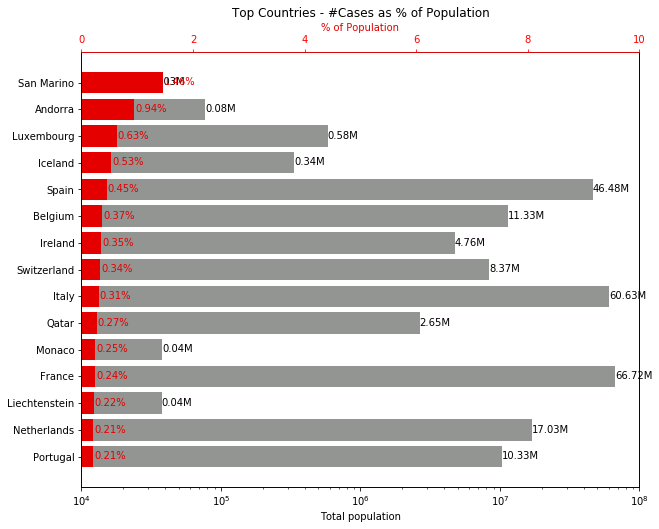

In [41]:
max_ctys = 15
fig,ax1 = plt.subplots(figsize=(10, 8)) 

df_gmerged_h = df_gmerged.sort_values(by=['% of pop'],ascending=False).head(max_ctys)

ax1.set_xscale('log')
ax1.set(xlim=[10**4, 10**8])   # get max min +/- buffer
ax1.set_xlabel('Total population')  
ax1.barh(df_gmerged_h['Country/Region'], df_gmerged_h['Population'], color='xkcd:grey')
for n,i in enumerate(ax1.patches):
    ax1.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['Population'].div(1000000).round(2).iloc[n:n+1].item()) + 'M', color='xkcd:black')

    
ax2 = ax1.twiny()
ax2.set_xscale('linear')
ax2.set(xlim=[0, 10])   # get max min +/- buffer
ax2.set_xlabel('% of Population', color='xkcd:red')  
ax2.spines['top'].set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.barh(df_gmerged_h['Country/Region'], df_gmerged_h['% of pop'], color='xkcd:red')
for n,i in enumerate(ax2.patches):
    ax2.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['% of pop'].iloc[n:n+1].item()) + '%', color='xkcd:red')
plt.title('Top Countries - #Cases as % of Population')
plt.gca().invert_yaxis()
plt.show()

# Emerging Markets (>100 cases)

In [42]:
# EMERGING markets - > 100 but not biggest
minct = 100

dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > minct]

display('top 20 growth countries, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-6:].rename(columns=lambda x: x.replace('00:00:00','').replace('2020-','')))


'top 20 growth countries, > 100 cases'

,04-20,04-20 %chg,04-21,04-21 %chg,04-22,04-22 %chg
Country/Region,,,,,,
Sudan,107,62.0,107,0.0,140,31.0
Nigeria,665,6.0,665,0.0,873,31.0
Mali,246,10.0,258,5.0,293,14.0
Congo (Brazzaville),160,12.0,165,3.0,186,13.0
Tanzania,254,49.0,254,0.0,284,12.0
Bangladesh,2948,20.0,3382,15.0,3772,12.0
Singapore,8014,22.0,9125,14.0,10141,11.0
Ghana,1042,0.0,1042,0.0,1154,11.0
Guinea,622,7.0,688,11.0,761,11.0


# Global Heatmap (Using Shape Files) - WIP


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,last
107,France,3.9339,-53.1258,0,0,0,0,0,0,0,...,86,86,86,96,96,96,97,97,97,97
108,France,-17.6797,149.4068,0,0,0,0,0,0,0,...,55,55,55,55,55,55,56,56,57,57
109,France,16.2500,-61.5833,0,0,0,0,0,0,0,...,145,145,145,145,148,148,148,148,148,148
110,France,-12.8275,45.1662,0,0,0,0,0,0,0,...,217,217,233,245,254,271,271,311,326,326
111,France,-20.9043,165.6180,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
112,France,-21.1351,55.2471,0,0,0,0,0,0,0,...,391,391,394,402,407,408,408,410,410,410
113,France,17.9000,-62.8333,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,France,18.0708,-63.0501,0,0,0,0,0,0,0,...,32,35,35,35,37,37,37,37,38,38
115,France,14.6415,-61.0242,0,0,0,0,0,0,0,...,157,158,158,158,158,163,163,163,164,164
116,France,46.2276,2.2137,0,0,2,3,3,3,4,...,130253,133470,145960,147969,147969,152894,155275,158050,155860,155860


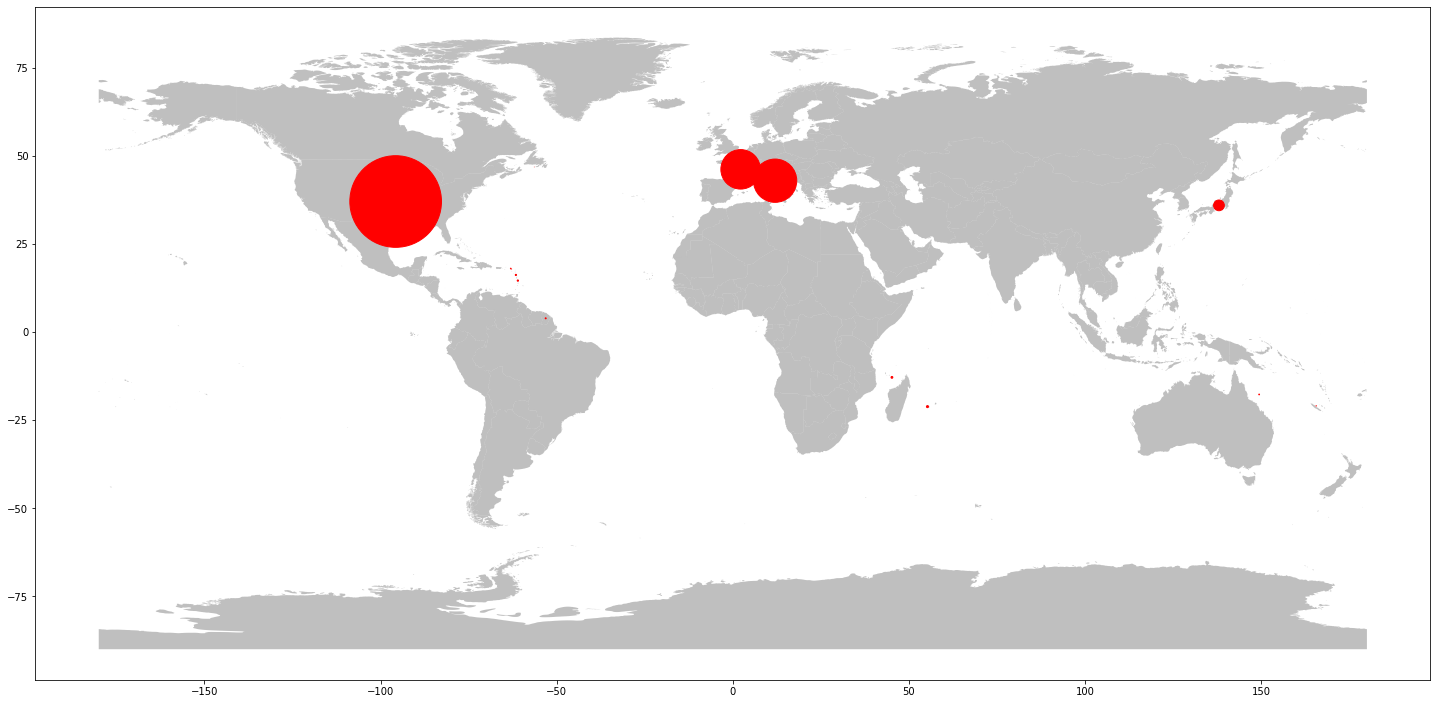

In [43]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last


In [ ]:
from urllib.request import urlopen
import plotly.figure_factory as ff
import json

# https://plotly.com/python/builtin-colorscales/

def draw_choro(values, fips, title, legend, colorscale, min, max):    
    endpts = list(np.linspace(min, max, len(colorscale) - 1))

    fig = ff.create_choropleth(
        fips=fips, values=values, scope=['usa'],
        binning_endpoints=endpts, 
        colorscale=colorscale,
        show_state_data=False,
        show_hover=False,
        asp = 2.9,
        title_text = title,
        legend_title = legend
    )
    fig.update_layout(autosize=False,width=600, height=310)
    fig.layout.template = None
    fig.show()

df = df_merged_tmp[['countyFIPS','County Name','State']].copy()
df['countyFIPSstr'] = df['countyFIPS'].apply(lambda x: str(x) if x > 9999 else '0'+str(x))  # make 5char lpadded
fips = df['countyFIPSstr'].tolist()
display(df.shape)

## -- US cases
# http://www.perbang.dk/rgbgradient/ - color picker
colorscale = ['rgb(245,245,245)', 'rgb(254,224,210)', 'rgb(252,187,161)', 'rgb(252,146,114)', 'rgb(251,106,74)', 'rgb(239,59,44)', 'rgb(203,24,29)', 'rgb(165,15,21)', 'rgb(103,0,13)']
df['count'] = dfc[dfc.columns[-1]]  # n days ago
df['countLog'] = df['count'].apply(lambda x: round(np.log(x),1) if x != 0 else 0)
values = df['countLog'].tolist()
draw_choro(values, fips, 'COVID Cases Today', '#Cases (LN)', colorscale, 1, 12)
